In [2]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from tqdm.notebook import tqdm
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
import time
from selenium.webdriver.common.by import By
import urllib

In [7]:
options = webdriver.ChromeOptions()
prefs = {"download.default_directory":"/home/rds/amr_ws/edm/data",
         "download.prompt_for_download":False}
options.add_experimental_option("prefs",prefs)
url = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome(service=Service("../../driver/chromedriver-linux64/chromedriver"),
                          options=options)
driver.get(url)

In [8]:
sido = driver.find_element(By.ID, "SIDO_NM0")
sido_list = sido.find_elements(By.TAG_NAME, "option")
for idx, sido_name in enumerate(sido_list):
    print(str(idx) + ". " + sido_name.get_attribute("value"))

sido_names = [sido_name.get_attribute("value") for sido_name in sido_list]
sido_names = sido_names[1:]
sido.send_keys(sido_names[0])

0. 
1. 서울특별시
2. 부산광역시
3. 대구광역시
4. 인천광역시
5. 광주광역시
6. 대전광역시
7. 울산광역시
8. 세종특별자치시
9. 경기도
10. 강원특별자치도
11. 충청북도
12. 충청남도
13. 전라북도
14. 전라남도
15. 경상북도
16. 경상남도
17. 제주특별자치도


In [9]:
gu = driver.find_element(By.ID, "SIGUNGU_NM0")
gu_list = gu.find_elements(By.TAG_NAME, "option")
gu_names = [gu_name.get_attribute("value") for gu_name in gu_list]
gu_names = gu_names[1:]


In [13]:
import time
from bs4 import BeautifulSoup

oil_price_D = []
oil_price_G = []
oil_address = []
oil_names = []
oil_brand = []
oil_more_info = [[],[],[],[],[]]

for gu_name in gu_names:
    gu = driver.find_element(By.ID, "SIGUNGU_NM0")
    gu.send_keys(gu_name)

    oil_data = driver.find_element(By.TAG_NAME, "tbody")
    oil_list = oil_data.find_elements(By.TAG_NAME, "a")
    
    
    for oil_station in oil_list:
        wait = WebDriverWait(driver, timeout=30).until(EC.element_to_be_clickable(
            (By.TAG_NAME, "a")))
        oil_station.click()
        page = driver.page_source
        
        soup = BeautifulSoup(page, "html.parser")
        


        time.sleep(0.1)
        oil_name = driver.find_element(By.ID, "os_nm")
        oil_names.append(soup.find(id="os_nm").string)
        oil_address.append(soup.find(id="rd_addr").string)
        oil_brand.append(soup.find(id="poll_div_nm").string)
        oil_price_G.append(soup.find(id="b027_p").string)
        oil_price_D.append(soup.find(id="d047_p").string)
        
        oil_more_info[0].append((soup.find(id="cwsh_yn")["src"]).find("off"))
        oil_more_info[1].append((soup.find(id="lpg_yn")["src"]).find("off"))
        oil_more_info[2].append((soup.find(id="maint_yn")["src"]).find("off"))
        oil_more_info[3].append((soup.find(id="cvs_yn")["src"]).find("off"))
        oil_more_info[4].append((soup.find(id="sel24_yn")["src"]).find("off"))
        
    

 

In [14]:
for i in range(len(oil_more_info)):
    for j in range(len(oil_more_info[i])):
        if oil_more_info[i][j] == -1:
            oil_more_info[i][j] = 1
        else:
            oil_more_info[i][j] = 0




In [15]:
for i in range(len(oil_price_D)):#가격에서 , 제외 후 float로 변경
    oil_price_D[i] = float(oil_price_D[i].replace(",",""))
    oil_price_G[i] = float(oil_price_G[i].replace(",",""))
    


print(oil_price_D)

[1469.0, 1489.0, 1535.0, 1519.0, 1559.0, 1539.0, 1535.0, 1545.0, 1554.0, 1567.0, 1567.0, 1620.0, 1615.0, 1615.0, 1598.0, 1669.0, 1697.0, 1697.0, 1698.0, 1829.0, 1834.0, 1849.0, 1792.0, 1935.0, 2026.0, 2037.0, 2062.0, 1998.0, 2086.0, 2195.0, 2380.0, 2560.0, 1469.0, 1485.0, 1538.0, 1538.0, 1565.0, 1575.0, 1585.0, 1588.0, 1590.0, 1594.0, 1639.0, 1609.0, 1743.0, 1858.0, 1424.0, 1424.0, 1424.0, 1425.0, 1424.0, 1415.0, 1424.0, 1449.0, 1455.0, 1475.0, 1488.0, 1497.0, 1389.0, 1433.0, 1419.0, 1419.0, 1419.0, 1419.0, 1443.0, 1443.0, 1429.0, 1435.0, 1450.0, 1495.0, 1504.0, 1494.0, 1496.0, 1497.0, 1556.0, 1538.0, 1558.0, 1546.0, 1498.0, 1495.0, 1558.0, 1558.0, 1559.0, 1568.0, 1578.0, 1578.0, 1563.0, 1598.0, 1598.0, 1680.0, 1860.0, 1464.0, 1464.0, 1464.0, 1464.0, 1474.0, 1474.0, 1475.0, 1485.0, 1485.0, 1496.0, 1498.0, 1565.0, 1668.0, 1699.0, 1435.0, 1435.0, 1444.0, 1447.0, 1449.0, 1442.0, 1455.0, 1442.0, 1449.0, 1487.0, 1597.0, 1598.0, 1697.0, 1414.0, 1414.0, 1414.0, 1415.0, 1425.0, 1439.0, 1435.0,

In [16]:
oil_df = pd.DataFrame(index=oil_names) #데이터 정리
oil_df["주소"] = oil_address
oil_df["브랜드"] = oil_brand
oil_df["휘발유"] = oil_price_G
oil_df["경유"] = oil_price_D
oil_df["세차장"] = oil_more_info[0]
oil_df["충전소"] = oil_more_info[1]
oil_df["경정비"] = oil_more_info[2]
oil_df["편의점"] = oil_more_info[3]
oil_df["24시"] = oil_more_info[4]

In [180]:
oil_df

,주소,브랜드,휘발유,경유,세차장,충전소,경정비,편의점,24시
(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,1559.0,1469.0,1,0,0,0,0
HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,HD현대오일뱅크,1569.0,1489.0,1,0,0,0,0
삼성동주유소,서울 강남구 테헤란로 619 (삼성동),HD현대오일뱅크,1573.0,1535.0,1,0,0,0,0
방죽주유소,서울 강남구 밤고개로 215 (율현동),GS칼텍스,1597.0,1519.0,1,0,0,0,0
자곡셀프주유소,서울 강남구 밤고개로 120 (자곡동),SK에너지,1598.0,1559.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
(주)태영 구도일주유소 한인,서울 중랑구 망우로 170 (상봉동),S-OIL,1547.0,1457.0,1,0,1,0,0
신내주유소,서울 중랑구 용마산로 705 (신내동),SK에너지,1563.0,1482.0,1,0,0,0,0
범아주유소,서울 중랑구 동일로 881 (묵동),S-OIL,1588.0,1498.0,1,0,1,0,0
용마로주유소,서울 중랑구 용마산로 309 (면목동),SK에너지,1588.0,1488.0,1,0,0,0,0


In [17]:
print("휘발유 평균가 :",oil_df["휘발유"].mean())
print("경유 평균가 :",oil_df["경유"].mean())


휘발유 평균가 : 1636.6947608200455
경유 평균가 : 1562.3507972665147


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

<Axes: >

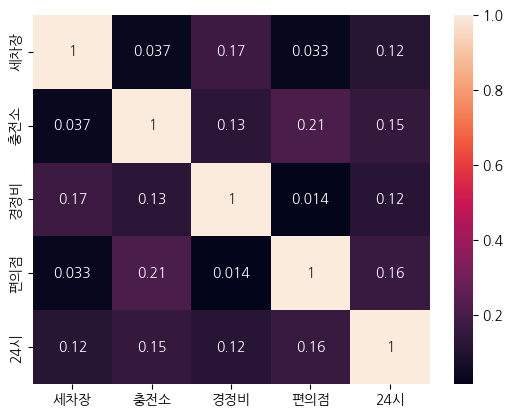

In [19]:
plt.rc("font", family="NanumGothic")
oil_heatmap = pd.DataFrame()
oil_heatmap["세차장"] = oil_df["세차장"]
oil_heatmap["충전소"] = oil_df["충전소"]
oil_heatmap["경정비"] = oil_df["경정비"]
oil_heatmap["편의점"] = oil_df["편의점"]
oil_heatmap["24시"] = oil_df["24시"]
sns.heatmap(oil_heatmap.corr(),annot=True)



In [20]:
driver.close()